In [1013]:
import plotly.offline as py 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import seaborn as sns

Carico il dataset "data.tsv" contentente i film di IMDB

In [1014]:
titles=pd.read_csv("data.tsv", sep='\t')

C:\Users\salvo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning:

Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.



In [1015]:
titles.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,\N,1,Short
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,\N,1,"Short,Sport"
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,\N,1,"Documentary,Short"
8,tt0000009,short,Miss Jerry,Miss Jerry,0,1894,\N,40,"Romance,Short"
9,tt0000010,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0,1895,\N,1,"Documentary,Short"


In [1016]:
titles.shape

(7619417, 9)

Carico il dataset "ratings.tsv" contentente i rating medio dei film IMDB, cancello le righe duplicate e le righe il cui valore startYear contiene un valore non numerico

In [1017]:
title_ratings=pd.read_csv("ratings.tsv", sep='\t')
title_ratings.head(10)


,tconst,averageRating,numVotes
0,tt0000001,5.7,1681
1,tt0000002,6.0,207
2,tt0000003,6.5,1418
3,tt0000004,6.1,122
4,tt0000005,6.1,2215
5,tt0000006,5.3,121
6,tt0000007,5.4,675
7,tt0000008,5.4,1855
8,tt0000009,6.0,157
9,tt0000010,6.9,6206


In [1018]:
title_ratings.shape

(1123765, 3)

In [1019]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7619417 entries, 0 to 7619416
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 523.2+ MB


In [1020]:
titles=titles.drop_duplicates()

In [1021]:
titles.shape

(7619417, 9)

In [1022]:
titles=titles[['titleType','tconst','primaryTitle', 'originalTitle', 'startYear']]
titles=titles[titles.titleType=='movie']
titles=titles[titles.startYear.apply(lambda x: str(x).isnumeric())] 
titles.head()

,titleType,tconst,primaryTitle,originalTitle,startYear
498,movie,tt0000502,Bohemios,Bohemios,1905
570,movie,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906
610,movie,tt0000615,Robbery Under Arms,Robbery Under Arms,1907
625,movie,tt0000630,Hamlet,Amleto,1908
668,movie,tt0000675,Don Quijote,Don Quijote,1908


In [1023]:
titles.shape

(497883, 5)

In [1024]:
titles.shape

(497883, 5)

Effetto il merge (inner) tra i due dataset precedenti, cancello i duplicati

In [1025]:
ratings_and_titles=pd.merge(title_ratings.set_index('tconst'), titles.set_index('tconst'), left_index=True, right_index=True, how='inner')
ratings_and_titles=ratings_and_titles.drop_duplicates()

#ratings_and_titles.loc[(ratings_and_titles['primaryTitle']=='Brothers') ]


In [1026]:
ratings_and_titles.head()

,averageRating,numVotes,titleType,primaryTitle,originalTitle,startYear
tconst,,,,,,
tt0000502,4.5,8,movie,Bohemios,Bohemios,1905
tt0000574,6.1,618,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,1906
tt0000615,4.5,14,movie,Robbery Under Arms,Robbery Under Arms,1907
tt0000630,3.2,11,movie,Hamlet,Amleto,1908
tt0000675,4.9,9,movie,Don Quijote,Don Quijote,1908


In [1027]:
ratings_and_titles.shape

(259861, 6)

Inserisco il dataset di netflix, effetto il lowercasing del titolo, sia su quest'ultimo che sul dataset precedentente creato ed effettuo il merge (left, voglio tutte le colonne del dataset di netflix) sulle colonne (title,release_year)X(originalTitle,startYear)

In [1028]:
netflix_titles=pd.read_csv("netflix_titles.csv", index_col="show_id")

netflix_titles.release_year=netflix_titles.release_year.astype(np.int64)
ratings_and_titles.startYear=ratings_and_titles.startYear.astype(np.int64)
netflix_titles['title']=netflix_titles['title'].str.lower()
ratings_and_titles['originalTitle']=ratings_and_titles['originalTitle'].str.lower()
ratings_and_titles['primaryTitle']=ratings_and_titles['primaryTitle'].str.lower()
netflix_titles_rating=pd.merge(netflix_titles, ratings_and_titles, left_on=['title','release_year'], right_on=['originalTitle','startYear'], how='left')

In [1029]:
netflix_titles_rating.drop_duplicates()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,averageRating,numVotes,titleType,primaryTitle,originalTitle,startYear
0,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,NaN,NaN,NaN,NaN,NaN,NaN
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,6.0,567.0,movie,7:19,7:19,2016.0
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",4.6,849.0,movie,23:59,23:59,2011.0
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",7.1,133556.0,movie,9,9,2009.0
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,6.8,230003.0,movie,21,21,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7837,Movie,zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,6.6,3075.0,movie,zozo,zozo,2005.0
7838,Movie,zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,6.1,389.0,movie,zubaan,zubaan,2015.0
7839,Movie,zulu man in japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",NaN,NaN,NaN,NaN,NaN,NaN
7840,TV Show,zumbo's just desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,NaN,NaN,NaN,NaN,NaN,NaN


In [1030]:
netflix_titles_rating.isnull().values.any()

True

Cancello le colonne che non mi servono

In [1031]:
netflix_titles_rating.drop(['titleType','primaryTitle','originalTitle','startYear'], axis=1, inplace=True)

Controllo le colonne con NAN e vado a fillare 

In [1032]:
for i in netflix_titles_rating:
    print(str(i)+' '+str(netflix_titles_rating[i].isnull().sum()))

type 0
title 0
director 2393
cast 722
country 509
date_added 10
release_year 0
rating 7
duration 0
listed_in 0
description 0
averageRating 4618
numVotes 4618


In [1033]:
netflix_titles_rating['cast'].fillna("Unknown", inplace=True)
netflix_titles_rating['country'].fillna("Unknown", inplace=True)
netflix_titles_rating['rating'].fillna("Unknown", inplace=True)
netflix_titles_rating['date_added'].fillna(method='bfill', inplace=True)
netflix_titles_rating['director'].fillna("Unknown", inplace=True)

In [1034]:
netflix_titles_rating

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,averageRating,numVotes
0,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,NaN,NaN
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,6.0,567.0
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",4.6,849.0
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",7.1,133556.0
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,6.8,230003.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7837,Movie,zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,6.6,3075.0
7838,Movie,zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,6.1,389.0
7839,Movie,zulu man in japan,Unknown,Nasty C,Unknown,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",NaN,NaN
7840,TV Show,zumbo's just desserts,Unknown,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,NaN,NaN


In [1035]:
for i in netflix_titles_rating:
    print(str(i)+' '+str(netflix_titles_rating[i].isnull().sum()))

type 0
title 0
director 0
cast 0
country 0
date_added 0
release_year 0
rating 0
duration 0
listed_in 0
description 0
averageRating 4618
numVotes 4618


Vado a cancellare le occorrenze multiple (quelle che presentano diversi valori di avarageRating), prendo quelle con numVotes maggiori, potrei anche farlo per rating, basta sostituire numVotes---->averageRating.
Uso index per poter ripristinare ordinamento originale.

In [1036]:
x=netflix_titles_rating.copy()
index=np.arange(0,netflix_titles_rating.shape[0],1)
x['index']=index
x = x.sort_values('numVotes', ascending=False)
x = x.drop_duplicates(subset='title', keep='first')
x

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,averageRating,numVotes,index
2997,Movie,inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...","United States, United Kingdom","January 1, 2020",2010,PG-13,148 min,"Action & Adventure, Sci-Fi & Fantasy, Thrillers","In this mind-bending sci-fi thriller, a man ru...",8.8,2072833.0,2997
5035,Movie,pulp fiction,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Uma Thurman,...",United States,"January 1, 2019",1994,R,154 min,"Classic Movies, Cult Movies, Dramas",This stylized crime caper weaves together stor...,8.9,1830947.0,5035
6694,Movie,the matrix,"Lilly Wachowski, Lana Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",United States,"November 1, 2019",1999,R,136 min,"Action & Adventure, Sci-Fi & Fantasy",A computer hacker learns that what most people...,8.7,1680820.0,6694
6662,Movie,the lord of the rings: the return of the king,Peter Jackson,"Elijah Wood, Ian McKellen, Liv Tyler, Viggo Mo...","New Zealand, United States","January 1, 2020",2003,PG-13,201 min,"Action & Adventure, Sci-Fi & Fantasy",Aragorn is revealed as the heir to the ancient...,8.9,1646455.0,6662
6663,Movie,the lord of the rings: the two towers,Peter Jackson,"Elijah Wood, Ian McKellen, Liv Tyler, Viggo Mo...","New Zealand, United States","January 1, 2020",2002,PG-13,179 min,"Action & Adventure, Sci-Fi & Fantasy",Frodo and Sam head to Mordor to destroy the On...,8.7,1489007.0,6663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7829,TV Show,zoids wild,Unknown,"Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...",Japan,"August 14, 2020",2018,TV-Y7,1 Season,"Anime Series, Kids' TV",A quest for freedom and legendary treasure beg...,NaN,NaN,7829
7831,TV Show,zombie dumb,Unknown,Unknown,Unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",NaN,NaN,7831
7833,TV Show,zona rosa,Unknown,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,"November 26, 2019",2019,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...,NaN,NaN,7833
7839,Movie,zulu man in japan,Unknown,Nasty C,Unknown,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",NaN,NaN,7839


Effettuo lo split della colonna listed_in che ha valori multipli, e metto i nuovi valori per riga, correggo gli errori sugli spazi

In [1037]:
x["listed_in"]=x["listed_in"].str.split(",")
netflix_splitted=x.explode("listed_in").reset_index(drop=True)
netflix_splitted['listed_in'] = netflix_splitted['listed_in']. str.lstrip () 
netflix_splitted['listed_in'] = netflix_splitted['listed_in']. str.lower() 

In [1038]:
netflix_splitted

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,averageRating,numVotes,index
0,Movie,inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...","United States, United Kingdom","January 1, 2020",2010,PG-13,148 min,action & adventure,"In this mind-bending sci-fi thriller, a man ru...",8.8,2072833.0,2997
1,Movie,inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...","United States, United Kingdom","January 1, 2020",2010,PG-13,148 min,sci-fi & fantasy,"In this mind-bending sci-fi thriller, a man ru...",8.8,2072833.0,2997
2,Movie,inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...","United States, United Kingdom","January 1, 2020",2010,PG-13,148 min,thrillers,"In this mind-bending sci-fi thriller, a man ru...",8.8,2072833.0,2997
3,Movie,pulp fiction,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Uma Thurman,...",United States,"January 1, 2019",1994,R,154 min,classic movies,This stylized crime caper weaves together stor...,8.9,1830947.0,5035
4,Movie,pulp fiction,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Uma Thurman,...",United States,"January 1, 2019",1994,R,154 min,cult movies,This stylized crime caper weaves together stor...,8.9,1830947.0,5035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17066,Movie,zulu man in japan,Unknown,Nasty C,Unknown,"September 25, 2020",2019,TV-MA,44 min,documentaries,"In this documentary, South African rapper Nast...",NaN,NaN,7839
17067,Movie,zulu man in japan,Unknown,Nasty C,Unknown,"September 25, 2020",2019,TV-MA,44 min,international movies,"In this documentary, South African rapper Nast...",NaN,NaN,7839
17068,Movie,zulu man in japan,Unknown,Nasty C,Unknown,"September 25, 2020",2019,TV-MA,44 min,music & musicals,"In this documentary, South African rapper Nast...",NaN,NaN,7839
17069,TV Show,zumbo's just desserts,Unknown,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,international tv shows,Dessert wizard Adriano Zumbo looks for the nex...,NaN,NaN,7840


In [1039]:
netflix_splitted['listed_in'].value_counts()

international movies            2437
dramas                          2106
comedies                        1471
international tv shows          1199
documentaries                    786
action & adventure               721
tv dramas                        704
independent movies               673
children & family movies         532
romantic movies                  531
tv comedies                      525
thrillers                        491
crime tv shows                   427
kids' tv                         414
docuseries                       353
romantic tv shows                333
stand-up comedy                  329
music & musicals                 321
horror movies                    312
british tv shows                 232
reality tv                       222
sci-fi & fantasy                 218
sports movies                    196
tv action & adventure            150
korean tv shows                  150
anime series                     148
spanish-language tv shows        147
c

Per ogni stile prendo il numero di occorrenze, e il voto medio. Devo decidere come trattare i NAN

In [1040]:
summary_avg_rate= netflix_splitted.groupby("listed_in")['averageRating'].agg(["mean", "size"])#raggruppiamo e facciamo la 
summary_avg_rate.columns = ["VotoMedio", 'Totale'] #rinominiamo le colonne ottenute

summary_avg_rate=summary_avg_rate.sort_values(by=['Totale'],ascending=False)
summary_avg_rate.loc['dramas'].VotoMedio

6.413404255319158

Per ogni stile vedo le etichette di Parental Advisor

In [1041]:
summary= netflix_splitted.groupby(["listed_in",'rating'])['rating'].agg(["size"])#raggruppiamo e facciamo la 
summary.columns = ['Totale'] #rinominiamo le colonne ottenute

summary=summary.sort_values(by=['Totale'],ascending=False)
summary

Totale
listed_in                    rating         
international movies         TV-MA       983
                             TV-14       946
dramas                       TV-MA       720
international tv shows       TV-MA       621
dramas                       TV-14       610
...                                      ...
sports movies                TV-Y7         1
stand-up comedy & talk shows NR            1
tv action & adventure        NR            1
                             TV-G          1
international tv shows       Unknown       1

[303 rows x 1 columns]

Funzione per vedere i titoli che compaiono conteporaneamente nelle categorie desiderate

In [1042]:
def multi_categ(x,y):
    y = map(lambda x: x.lower(),y)
    list_=[]
    for i in y:
        df=x.loc[x['listed_in']==i]
        list_.append(df['title'])
        c=set(list_[0])
    for i in range(1,len(list_)):
        c= c & set(list_[i])
    return c  
x=multi_categ(netflix_splitted,['International Movies','Dramas','Independent Movies'])
x

{'18 presents',
 'a billion colour story',
 'a heavy heart',
 'a little chaos',
 'a sun',
 'a yellow bird',
 'aalorukkam',
 'adore',
 'aisa yeh jahaan',
 'albert pinto ko gussa kyun aata hai?',
 'anarkali of aarah',
 'and breathe normally',
 'angry indian goddesses',
 'ankhon dekhi',
 'another forever',
 'anwar',
 'ascharyachakit!',
 'atlantics',
 'b.a. pass',
 'bazaar',
 'belmonte',
 'below her mouth',
 'beyond the clouds',
 'bhasmasur',
 'bhouri',
 'billy elliot',
 'blood will tell',
 'blue is the warmest color',
 'boi',
 'brain on fire',
 'brother',
 'budhia singh: born to run',
 'bulbul can sing',
 'burning',
 'candyflip',
 'chauthi koot',
 'chittagong',
 'cities of last things',
 'city of god',
 'colonia',
 'cézanne et moi',
 'dagh ujala',
 'dancing quietly',
 'divines',
 'do paise ki dhoop chaar aane ki baarish',
 'dolly kitty aur woh chamakte sitare',
 'dry martina',
 'dukhtar',
 'ek cup chya',
 'el silencio es bienvenido',
 'encounter: the killing',
 'evening shadows',
 'ex mac

Per ogni film vedo le categorie in cui è stato inserito

In [1043]:
summary= netflix_splitted.groupby(['title','listed_in'])['title'].agg(["size"])#raggruppiamo e facciamo la 
summary.columns = ['Totale'] #rinominiamo le colonne ottenute

summary=summary.sort_values(by=['Totale'],ascending=False)
summary

Totale
title               listed_in                       
#alive              horror movies                  1
rim of the world    sci-fi & fantasy               1
ride on time        docuseries                     1
                    international tv shows         1
riding faith        children & family movies       1
...                                              ...
hard tide           dramas                         1
                    independent movies             1
hardcore henry      action & adventure             1
                    international movies           1
최강전사 미니특공대 : 영웅의 탄생 children & family movies       1

[17071 rows x 1 columns]

In [1044]:
netflix_splitted=netflix_splitted.sort_values(by='index')
netflix_splitted.drop('index',inplace=True,axis=1)
netflix_splitted

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,averageRating,numVotes
7088,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,tv dramas,In a future where the elite inhabit an island ...,NaN,NaN
7089,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,tv sci-fi & fantasy,In a future where the elite inhabit an island ...,NaN,NaN
7087,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,international tv shows,In a future where the elite inhabit an island ...,NaN,NaN
5150,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,international movies,After a devastating earthquake hits Mexico Cit...,6.0,567.0
5149,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,dramas,After a devastating earthquake hits Mexico Cit...,6.0,567.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17068,Movie,zulu man in japan,Unknown,Nasty C,Unknown,"September 25, 2020",2019,TV-MA,44 min,music & musicals,"In this documentary, South African rapper Nast...",NaN,NaN
17069,TV Show,zumbo's just desserts,Unknown,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,international tv shows,Dessert wizard Adriano Zumbo looks for the nex...,NaN,NaN
17070,TV Show,zumbo's just desserts,Unknown,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,reality tv,Dessert wizard Adriano Zumbo looks for the nex...,NaN,NaN
4470,Movie,zz top: that little ol' band from texas,Sam Dunn,Unknown,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,music & musicals,This documentary delves into the mystique behi...,7.5,1208.0


In [1045]:
netflix_splitted_cpy=netflix_splitted.copy()
netflix_splitted_cpy['averageRating'].fillna(0, inplace=True)
netflix_splitted_cpy['numVotes'].fillna(0, inplace=True)
df = pd.DataFrame()
row_list=[]
for index, row in netflix_splitted_cpy.iterrows():
    
    if row['averageRating']== 0:
        gen=row['listed_in']
        voto=summary_avg_rate.loc[gen].VotoMedio
        row.at['averageRating']=np.round(voto,2)
        row_list.append(row)
    else:
        row_list.append(row)
print(len(row_list))       
df = pd.DataFrame(row_list)
df.tail(50)

#netflix_splitted_cpy['director'].fillna("Unknown", inplace=True)

17071


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,averageRating,numVotes
17049,TV Show,zindagi gulzar hai,Unknown,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,romantic tv shows,"Strong-willed, middle-class Kashaf and carefre...",5.67,0.0
17048,TV Show,zindagi gulzar hai,Unknown,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,international tv shows,"Strong-willed, middle-class Kashaf and carefre...",6.34,0.0
5369,Movie,zindagi kitni haseen hay,Anjum Shahzad,"Feroze Khan, Sajal Ali, Jibrayl Ahmed Rajput, ...",Pakistan,"October 1, 2018",2016,TV-14,126 min,romantic movies,Two young parents struggle to keep their marri...,5.90,438.0
5368,Movie,zindagi kitni haseen hay,Anjum Shahzad,"Feroze Khan, Sajal Ali, Jibrayl Ahmed Rajput, ...",Pakistan,"October 1, 2018",2016,TV-14,126 min,international movies,Two young parents struggle to keep their marri...,5.90,438.0
5367,Movie,zindagi kitni haseen hay,Anjum Shahzad,"Feroze Khan, Sajal Ali, Jibrayl Ahmed Rajput, ...",Pakistan,"October 1, 2018",2016,TV-14,126 min,dramas,Two young parents struggle to keep their marri...,5.90,438.0
991,Movie,zindagi na milegi dobara,Zoya Akhtar,"Hrithik Roshan, Abhay Deol, Farhan Akhtar, Kat...",India,"December 15, 2019",2011,TV-14,154 min,international movies,Three friends on an adventurous road trip/bach...,8.10,68068.0
990,Movie,zindagi na milegi dobara,Zoya Akhtar,"Hrithik Roshan, Abhay Deol, Farhan Akhtar, Kat...",India,"December 15, 2019",2011,TV-14,154 min,dramas,Three friends on an adventurous road trip/bach...,8.10,68068.0
989,Movie,zindagi na milegi dobara,Zoya Akhtar,"Hrithik Roshan, Abhay Deol, Farhan Akhtar, Kat...",India,"December 15, 2019",2011,TV-14,154 min,comedies,Three friends on an adventurous road trip/bach...,8.10,68068.0
4699,Movie,zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,thrillers,Recovering alcoholic Talal wakes up inside a s...,6.70,895.0
4697,Movie,zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,dramas,Recovering alcoholic Talal wakes up inside a s...,6.70,895.0


## PREPROCESSING CLUSTERING 

Controllo il numero di generi

In [1046]:
generi = df['listed_in'].tolist() 
generi_unici = set(generi) # creating a set get unique genres
lista_generi= list(generi_unici)
lista_generi
print(len(lista_generi))

42


Mi servono dati numerici per l'analisi, effettuo pivoting colonne, aggiungo 1 colonna per ogni genere e se il film è presente lo etichetto con 1

In [1047]:
df_copy=df.copy()
for j in lista_generi:
    df_copy[j] = 0
df_copy.info()   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17071 entries, 7088 to 4469
Data columns (total 55 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   type                          17071 non-null  object 
 1   title                         17071 non-null  object 
 2   director                      17071 non-null  object 
 3   cast                          17071 non-null  object 
 4   country                       17071 non-null  object 
 5   date_added                    17071 non-null  object 
 6   release_year                  17071 non-null  int64  
 7   rating                        17071 non-null  object 
 8   duration                      17071 non-null  object 
 9   listed_in                     17071 non-null  object 
 10  description                   17071 non-null  object 
 11  averageRating                 16759 non-null  float64
 12  numVotes                      17071 non-null  float64
 13 

In [1048]:
df_copy

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,...,tv mysteries,reality tv,tv dramas,british tv shows,classic & cult tv,independent movies,korean tv shows,international tv shows,anime features,lgbtq movies
7088,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,tv dramas,...,0,0,0,0,0,0,0,0,0,0
7089,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,tv sci-fi & fantasy,...,0,0,0,0,0,0,0,0,0,0
7087,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,international tv shows,...,0,0,0,0,0,0,0,0,0,0
5150,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,international movies,...,0,0,0,0,0,0,0,0,0,0
5149,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,dramas,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17068,Movie,zulu man in japan,Unknown,Nasty C,Unknown,"September 25, 2020",2019,TV-MA,44 min,music & musicals,...,0,0,0,0,0,0,0,0,0,0
17069,TV Show,zumbo's just desserts,Unknown,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,international tv shows,...,0,0,0,0,0,0,0,0,0,0
17070,TV Show,zumbo's just desserts,Unknown,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,reality tv,...,0,0,0,0,0,0,0,0,0,0
4470,Movie,zz top: that little ol' band from texas,Sam Dunn,Unknown,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,music & musicals,...,0,0,0,0,0,0,0,0,0,0


In [1049]:
for j in lista_generi: #iterating through unique genres
    df_copy[j] = df_copy.listed_in.apply(lambda x: 1 if j in x else 0)

df_copy = df_copy.rename(columns={'thrillers': 'thrillers movies'})
df_copy['listed_in'] = df_copy.listed_in.apply(lambda x: 'thriller movies' if x=='thrillers' else x) 
'''x=df_copy['listed_in'].values
for j in lista_generi:
    appoggio=[]
    for i in range(0,len(x)):
        if x[i]==j:
            appoggio.append(1)
        else:
            appoggio.append(0)
    df_copy[j]=appoggio'''

"x=df_copy['listed_in'].values\nfor j in lista_generi:\n    appoggio=[]\n    for i in range(0,len(x)):\n        if x[i]==j:\n            appoggio.append(1)\n        else:\n            appoggio.append(0)\n    df_copy[j]=appoggio"

In [1050]:
df_copy

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,...,tv mysteries,reality tv,tv dramas,british tv shows,classic & cult tv,independent movies,korean tv shows,international tv shows,anime features,lgbtq movies
7088,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,tv dramas,...,0,0,1,0,0,0,0,0,0,0
7089,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,tv sci-fi & fantasy,...,0,0,0,0,0,0,0,0,0,0
7087,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,international tv shows,...,0,0,0,0,0,0,0,1,0,0
5150,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,international movies,...,0,0,0,0,0,0,0,0,0,0
5149,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,dramas,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17068,Movie,zulu man in japan,Unknown,Nasty C,Unknown,"September 25, 2020",2019,TV-MA,44 min,music & musicals,...,0,0,0,0,0,0,0,0,0,0
17069,TV Show,zumbo's just desserts,Unknown,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,international tv shows,...,0,0,0,0,0,0,0,1,0,0
17070,TV Show,zumbo's just desserts,Unknown,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,reality tv,...,0,1,0,0,0,0,0,0,0,0
4470,Movie,zz top: that little ol' band from texas,Sam Dunn,Unknown,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,music & musicals,...,0,0,0,0,0,0,0,0,0,0


In [1051]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17071 entries, 7088 to 4469
Data columns (total 55 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   type                          17071 non-null  object 
 1   title                         17071 non-null  object 
 2   director                      17071 non-null  object 
 3   cast                          17071 non-null  object 
 4   country                       17071 non-null  object 
 5   date_added                    17071 non-null  object 
 6   release_year                  17071 non-null  int64  
 7   rating                        17071 non-null  object 
 8   duration                      17071 non-null  object 
 9   listed_in                     17071 non-null  object 
 10  description                   17071 non-null  object 
 11  averageRating                 16759 non-null  float64
 12  numVotes                      17071 non-null  float64
 13 

## K-MEANS

I dati sono pronti, applichiamo i modelli e facciamo variare K

In [1052]:
from sklearn.cluster import KMeans

In [1053]:
x=df_copy.iloc[:,13:]
kmeans = KMeans(n_clusters=4, random_state=0).fit(x)
kmeans2 = KMeans(n_clusters=10, random_state=0).fit(x)
kmeans3 = KMeans(n_clusters=18, random_state=0).fit(x)
kmeans4 = KMeans(n_clusters=42, random_state=0).fit(x)
kmeans5 = KMeans(n_clusters=15, random_state=0).fit(x)

In [1054]:
y=kmeans.predict(x)
y2=kmeans2.predict(x)
y3=kmeans3.predict(x)
y4=kmeans4.predict(x)
y5=kmeans5.predict(x)


In [1055]:
df_copy['cluster']=y
df_copy['cluster2']=y2
df_copy['cluster3']=y3
df_copy['cluster4']=y4
df_copy['cluster5']=y5

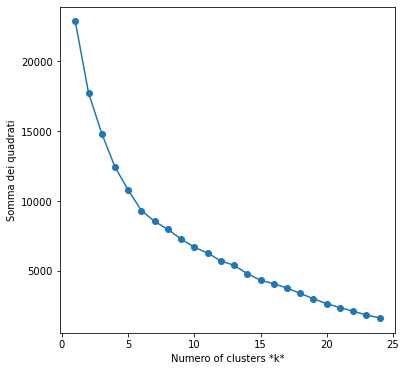

In [1056]:
sse = []
list_k = list(range(1, 25))

for k in list_k:
    km = KMeans(n_clusters=k,random_state=0).fit(x)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Numero of clusters *k*')
plt.ylabel('Somma dei quadrati');


In [1057]:
for i in range(0,4):
    x=df_copy.loc[df_copy.cluster==i]
    x=set(x['listed_in'])
    print(x)


{'classic movies', 'independent movies', 'movies', 'horror movies', 'international movies', 'cult movies', 'lgbtq movies', 'children & family movies', 'sports movies', 'romantic movies'}
{'tv comedies', 'faith & spirituality', 'anime series', 'tv thrillers', 'comedies', 'sci-fi & fantasy', 'docuseries', 'action & adventure', 'science & nature tv', 'stand-up comedy', 'documentaries', 'tv horror', 'tv sci-fi & fantasy', 'tv action & adventure', "kids' tv", 'music & musicals', 'stand-up comedy & talk shows', 'thriller movies', 'tv mysteries', 'reality tv', 'classic & cult tv', 'anime features'}
{'romantic tv shows', 'british tv shows', 'tv shows', 'korean tv shows', 'international tv shows', 'crime tv shows', 'teen tv shows', 'spanish-language tv shows'}
{'dramas', 'tv dramas'}


In [1058]:
for i in range(0,18):
    x=df_copy.loc[df_copy.cluster3==i]
    x=set(x['listed_in'])
    print(x)


{'classic movies', 'sports movies', 'movies', 'cult movies', 'children & family movies', 'lgbtq movies'}
{'tv shows', 'korean tv shows', 'crime tv shows', 'teen tv shows', 'spanish-language tv shows'}
{'tv horror', 'sci-fi & fantasy', 'reality tv', 'classic & cult tv', 'tv sci-fi & fantasy', 'faith & spirituality', 'docuseries', 'music & musicals', 'anime series', 'science & nature tv', 'anime features', 'thriller movies', 'tv thrillers', 'tv mysteries'}
{'tv comedies'}
{'documentaries'}
{'international movies'}
{'tv dramas'}
{'dramas'}
{'international tv shows'}
{'comedies'}
{"kids' tv"}
{'action & adventure', 'tv action & adventure'}
{'romantic tv shows'}
{'independent movies'}
{'romantic movies'}
{'british tv shows'}
{'horror movies'}
{'stand-up comedy & talk shows', 'stand-up comedy'}


In [1059]:
for i in range(0,42):
    x=df_copy.loc[df_copy.cluster4==i]
    x=set(x['listed_in'])
    print(x)


{'independent movies'}
{'dramas'}
{'international tv shows'}
{'tv comedies'}
{'movies'}
{'thriller movies'}
{'comedies'}
{'international movies'}
{'action & adventure'}
{'documentaries'}
{"kids' tv"}
{'tv shows'}
{'tv dramas'}
{'docuseries'}
{'stand-up comedy'}
{'music & musicals'}
{'sci-fi & fantasy'}
{'romantic movies'}
{'reality tv'}
{'children & family movies'}
{'romantic tv shows'}
{'british tv shows'}
{'korean tv shows'}
{'crime tv shows'}
{'anime series'}
{'tv action & adventure'}
{'tv mysteries'}
{'faith & spirituality'}
{'horror movies'}
{'science & nature tv'}
{'sports movies'}
{'spanish-language tv shows'}
{'tv horror'}
{'anime features'}
{'tv sci-fi & fantasy'}
{'classic movies'}
{'teen tv shows'}
{'lgbtq movies'}
{'cult movies'}
{'classic & cult tv'}
{'stand-up comedy & talk shows'}
{'tv thrillers'}


In [1060]:
for i in range(0,15):
    x=df_copy.loc[df_copy.cluster5==i]
    x=set(x['listed_in'])
    print(x)

{'classic movies', 'sports movies', 'movies', 'horror movies', 'cult movies', 'children & family movies', 'lgbtq movies'}
{'british tv shows', 'tv shows', 'korean tv shows', 'crime tv shows', 'teen tv shows', 'spanish-language tv shows'}
{'tv horror', 'sci-fi & fantasy', 'reality tv', 'classic & cult tv', 'tv sci-fi & fantasy', 'faith & spirituality', 'docuseries', 'music & musicals', 'stand-up comedy & talk shows', 'anime series', 'science & nature tv', 'stand-up comedy', 'anime features', 'thriller movies', 'tv thrillers', 'tv mysteries'}
{'tv comedies'}
{'documentaries'}
{'international movies'}
{'tv dramas'}
{'dramas'}
{'international tv shows'}
{'comedies'}
{"kids' tv"}
{'action & adventure', 'tv action & adventure'}
{'romantic tv shows'}
{'independent movies'}
{'romantic movies'}


SELEZIONO QUELLO CON K=10

In [1061]:
dict_generi={}
for i in range(0,10):
    x=df_copy.loc[df_copy.cluster2==i]
    x=list(set(x['listed_in']))
    dict_generi[i]=x

dict_generi

{0: ['classic movies',
  'independent movies',
  'movies',
  'horror movies',
  'cult movies',
  'lgbtq movies',
  'children & family movies',
  'sports movies'],
 1: ['tv horror',
  'sci-fi & fantasy',
  'reality tv',
  'classic & cult tv',
  'tv sci-fi & fantasy',
  'faith & spirituality',
  'tv mysteries',
  'docuseries',
  "kids' tv",
  'music & musicals',
  'stand-up comedy & talk shows',
  'anime series',
  'science & nature tv',
  'stand-up comedy',
  'anime features',
  'documentaries'],
 2: ['international movies'],
 3: ['dramas', 'tv dramas'],
 4: ['tv comedies', 'comedies'],
 5: ['romantic tv shows',
  'british tv shows',
  'tv shows',
  'korean tv shows',
  'crime tv shows',
  'teen tv shows',
  'spanish-language tv shows'],
 6: ['thriller movies', 'tv thrillers'],
 7: ['action & adventure', 'tv action & adventure'],
 8: ['romantic movies'],
 9: ['international tv shows']}

In [1062]:
dict_generi
x_d=pd.DataFrame({'Cluster':dict_generi.keys(), 'Valori':dict_generi.values()})
x_d

,Cluster,Valori
0,0,"[classic movies, independent movies, movies, h..."
1,1,"[tv horror, sci-fi & fantasy, reality tv, clas..."
2,2,[international movies]
3,3,"[dramas, tv dramas]"
4,4,"[tv comedies, comedies]"
5,5,"[romantic tv shows, british tv shows, tv shows..."
6,6,"[thriller movies, tv thrillers]"
7,7,"[action & adventure, tv action & adventure]"
8,8,[romantic movies]
9,9,[international tv shows]


In [1063]:
summary= df_copy.groupby(df_copy["cluster2"].values)["cluster2"].agg(["size"])#raggruppiamo e facciamo la 
summary.columns = ['Totale'] #rinominiamo le colonne ottenute

summary=summary.sort_values(by=['Totale'],ascending=False)
summary=pd.merge(summary,x_d, left_index=True, right_index=True, how='inner')
summary.reset_index(drop=True, inplace=True)
summary


,Totale,Cluster,Valori
0,3304,1,"[tv horror, sci-fi & fantasy, reality tv, clas..."
1,2810,3,"[dramas, tv dramas]"
2,2437,2,[international movies]
3,2021,0,"[classic movies, independent movies, movies, h..."
4,1996,4,"[tv comedies, comedies]"
5,1361,5,"[romantic tv shows, british tv shows, tv shows..."
6,1199,9,[international tv shows]
7,871,7,"[action & adventure, tv action & adventure]"
8,541,6,"[thriller movies, tv thrillers]"
9,531,8,[romantic movies]


In [1064]:
def sort_dict(dict_):
    sorted_dict = {}
    for i in sorted (dict_) : 
        key = i
        value=dict_[i]
        sorted_dict[key] = value
    return sorted_dict

dict_generi={}
for i in range(0,10):
    x=df_copy.loc[df_copy.cluster2==i]
    x=list(set(x['listed_in']))
    dict_generi[i]=x

num_of_contents = dict(df_copy['cluster2'].value_counts())
num_of_contents=sort_dict(num_of_contents)
print(num_of_contents)
labels=list(dict_generi.values())
values=list(num_of_contents.values())
bar = go.Pie(labels=labels, values=values, name='Contents for countries')
layout = go.Layout(title='Kmeans')  
data=[bar]
fig = go.Figure(data=data, layout=layout)   
py.plot(fig)   

  

{0: 2021, 1: 3304, 2: 2437, 3: 2810, 4: 1996, 5: 1361, 6: 541, 7: 871, 8: 531, 9: 1199}


'temp-plot.html'

## HIERARCHICAL CLUSTERING

In [1065]:
 from sklearn.cluster import AgglomerativeClustering

In [1066]:
x=df_copy.iloc[:,13:55]
df_copy['listed_in']

7088                  tv dramas
7089        tv sci-fi & fantasy
7087     international tv shows
5150       international movies
5149                     dramas
                  ...          
17068          music & musicals
17069    international tv shows
17070                reality tv
4470           music & musicals
4469              documentaries
Name: listed_in, Length: 17071, dtype: object

In [1067]:
clustering = AgglomerativeClustering(n_clusters=10,linkage='average',affinity='manhattan').fit(x)

In [1068]:
hclust=clustering.fit_predict(x)

In [1069]:
df_copy['cluster_hierc']=hclust
for i in range(0,10):
    x=df_copy.loc[df_copy.cluster_hierc==i]
    x=set(x['listed_in'])
    print(x)


{'tv horror', 'reality tv', 'classic & cult tv', 'faith & spirituality', 'docuseries', "kids' tv", 'music & musicals', 'science & nature tv', 'anime series', 'anime features', 'tv mysteries'}
{'romantic tv shows', 'british tv shows', 'tv shows', 'korean tv shows', 'international tv shows', 'crime tv shows', 'teen tv shows', 'spanish-language tv shows'}
{'classic movies', 'independent movies', 'movies', 'horror movies', 'international movies', 'cult movies', 'lgbtq movies', 'children & family movies', 'sports movies', 'romantic movies'}
{'tv comedies', 'comedies'}
{'sci-fi & fantasy', 'tv sci-fi & fantasy'}
{'dramas', 'tv dramas'}
{'action & adventure', 'tv action & adventure'}
{'stand-up comedy & talk shows', 'stand-up comedy'}
{'thriller movies', 'tv thrillers'}
{'documentaries'}


In [1070]:
dict_generi={}
for i in range(0,10):
    x=df_copy.loc[df_copy.cluster_hierc==i]
    x=list(set(x['listed_in']))
    dict_generi[i]=x
x_d=pd.DataFrame({'Cluster':dict_generi.keys(), 'Valori':dict_generi.values()})
x_d
summary= df_copy.groupby(df_copy["cluster_hierc"].values)["cluster_hierc"].agg(["size"])#raggruppiamo e facciamo la 
summary.columns = ['Totale'] #rinominiamo le colonne ottenute

summary=summary.sort_values(by=['Totale'],ascending=False)
summary=pd.merge(summary,x_d, left_index=True, right_index=True, how='inner')
summary.reset_index(drop=True, inplace=True)
summary

,Totale,Cluster,Valori
0,4989,2,"[classic movies, independent movies, movies, h..."
1,2810,5,"[dramas, tv dramas]"
2,2560,1,"[romantic tv shows, british tv shows, tv shows..."
3,1996,3,"[tv comedies, comedies]"
4,1843,0,"[tv horror, reality tv, classic & cult tv, fai..."
5,871,6,"[action & adventure, tv action & adventure]"
6,786,9,[documentaries]
7,541,8,"[thriller movies, tv thrillers]"
8,381,7,"[stand-up comedy & talk shows, stand-up comedy]"
9,294,4,"[sci-fi & fantasy, tv sci-fi & fantasy]"


In [1071]:
dict_generi={}
for i in range(0,10):
    x=df_copy.loc[df_copy.cluster_hierc==i]
    x=list(set(x['listed_in']))
    dict_generi[i]=x

num_of_contents = dict(df_copy['cluster_hierc'].value_counts())
num_of_contents=sort_dict(num_of_contents)
labels=list(dict_generi.values())
values=list(num_of_contents.values())
bar = go.Pie(labels=labels, values=values, name='Contents for countries')
layout = go.Layout(title='Hierac')  
data=[bar]
fig = go.Figure(data=data, layout=layout)   
py.plot(fig) 

'temp-plot.html'

#### PROVA DI PREDICTION

In [1072]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
x=df_copy.drop('averageRating',axis=1)
x=x.drop(x.iloc[:, 0:11], axis = 1)
x=x.drop(x.iloc[:, 1:48], axis = 1)
x.info()
x.values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17071 entries, 7088 to 4469
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   numVotes       17071 non-null  float64
 1   cluster_hierc  17071 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 1.0 MB


array([[0.000e+00, 5.000e+00],
       [0.000e+00, 4.000e+00],
       [0.000e+00, 1.000e+00],
       ...,
       [0.000e+00, 0.000e+00],
       [1.208e+03, 0.000e+00],
       [1.208e+03, 9.000e+00]])

In [1073]:
X_train, X_test, y_train, y_test = train_test_split(x.values,df_copy['averageRating'].fillna(0) , test_size=0.3, random_state=0)
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train, y_train)


RandomForestRegressor(n_estimators=1000, random_state=42)

In [1074]:
y_pred = regressor.predict(X_test)
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
6063,7.20,6.752956
9377,6.18,6.124304
5417,4.90,5.892533
5447,7.00,4.062188
15321,6.33,6.018520
...,...,...
620,6.00,5.668400
16005,5.67,6.018520
16150,5.60,4.725170
4961,5.40,6.449392


In [1075]:
regressor.score(X_test,y_test)


0.16251871994442002

C:\Users\salvo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\salvo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



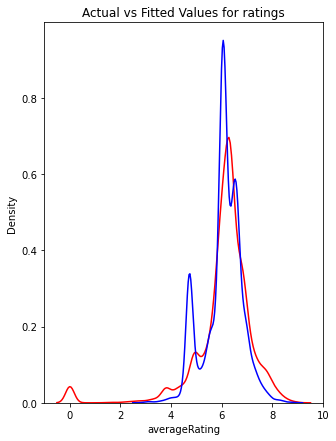

In [1076]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(df_copy['averageRating'].fillna(0), hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for ratings')


plt.show()
plt.close()

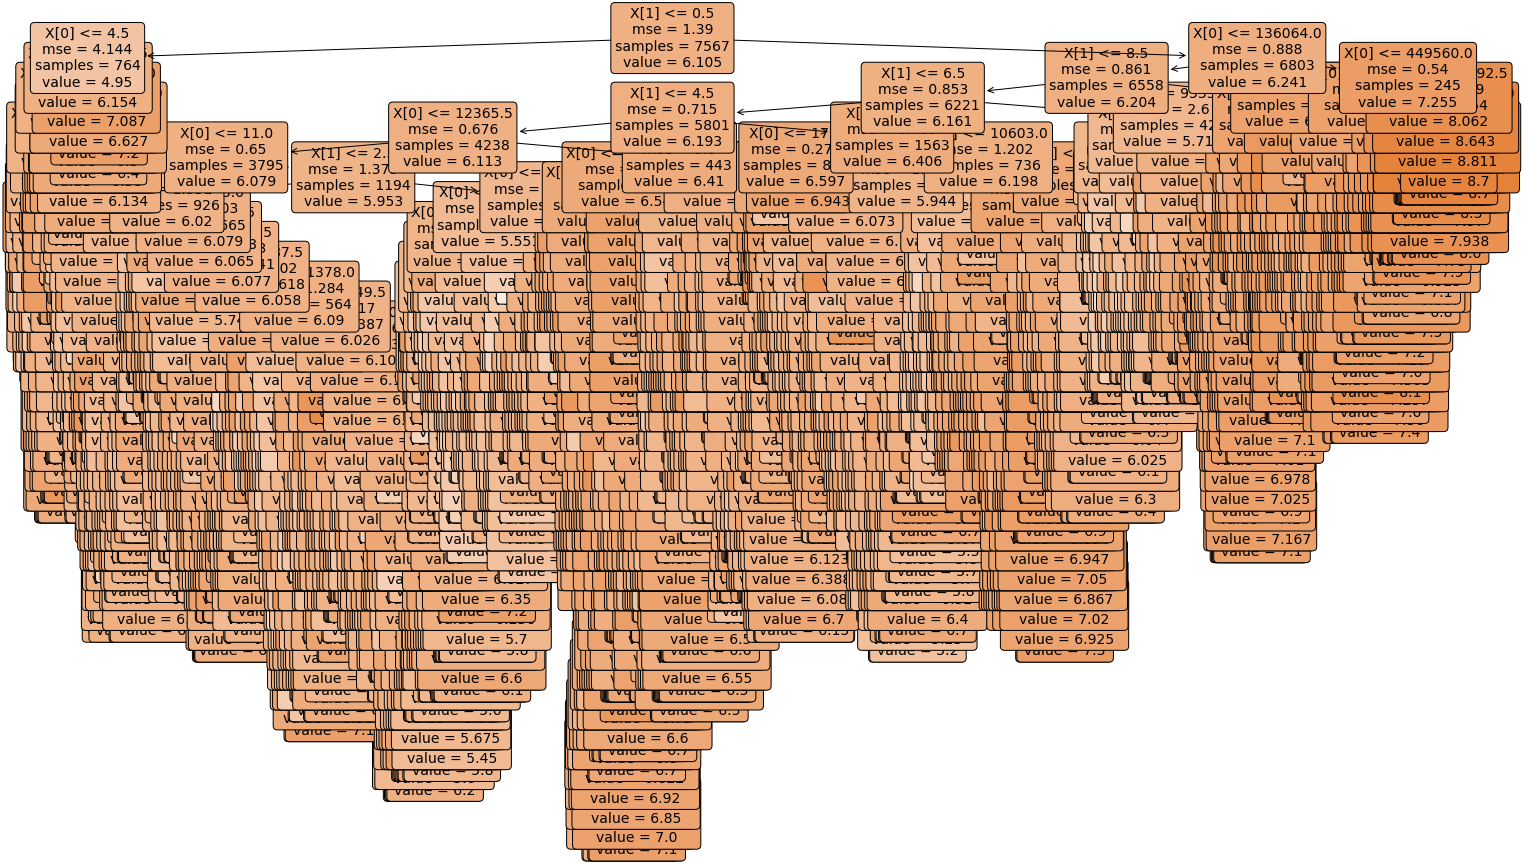

In [1077]:
import pydot
# Pull out one tree from the forest
Tree = regressor.estimators_[5]
# Export the image to a dot file
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(Tree,filled=True, 
              rounded=True, 
              fontsize=14);